In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
 
df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# 3. Lựa Chọn Đặc Trưng và Biến Mục Tiêu
X = df[['AGE', 'LSTAT']]
y = df['MEDV']


In [8]:
# 4. Chia Dữ Liệu Train và Test
# python
# Sao chép
# Chỉnh sửa

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)


In [ ]:
# 5. Định Nghĩa Hàm SiLu Transformation
def silu_transform(x):
    return x / (1 + np.exp(-x))


In [10]:
silu_transformer = FunctionTransformer(silu_transform)


In [11]:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)


In [12]:
pipeline = Pipeline([
    ('silu', silu_transformer),
    ('poly', poly_transformer),
    ('lr', LinearRegression())
])


In [13]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('silu',
                 FunctionTransformer(func=<function silu_transform at 0x000001F9022B3880>)),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [15]:
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [16]:
print("\nĐánh giá mô hình trên tập test:")
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



Đánh giá mô hình trên tập test:
R² score: 0.6958
Mean Squared Error: 19.6073


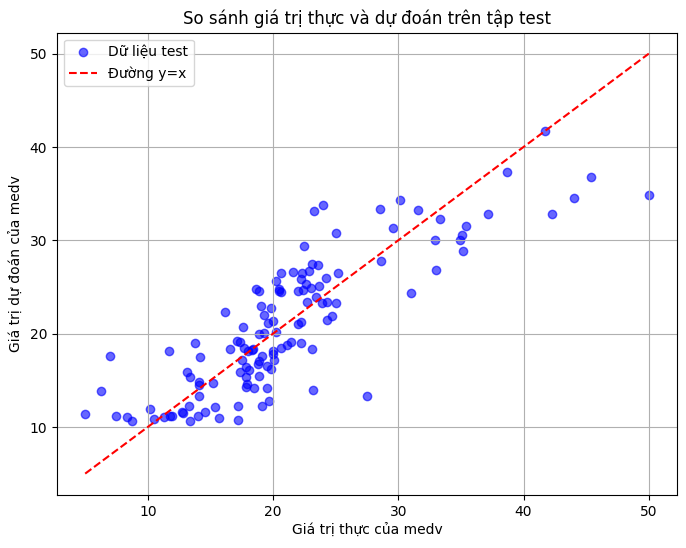

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Dữ liệu test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Đường y=x')
plt.xlabel('Giá trị thực của medv')
plt.ylabel('Giá trị dự đoán của medv')
plt.title('So sánh giá trị thực và dự đoán trên tập test')
plt.legend()
plt.grid(True)
plt.show()
